In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define os caminhos dos diretórios de treinamento, validação e teste
train_dir = './train'
validation_dir = './val'
test_dir = './val'

# Configura o gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# Carrega e pré-processa as imagens de treinamento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ajuste o tamanho conforme necessário
    batch_size=32,
    class_mode='categorical'
)
# Carrega e pré-processa as imagens de validação
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# Carrega e pré-processa as imagens de teste
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2475 images belonging to 4 classes.
Found 621 images belonging to 4 classes.
Found 621 images belonging to 4 classes.


In [5]:
# nomes das classes
class_names = ['glioma','meningioma', 'normal', 'pituitary']

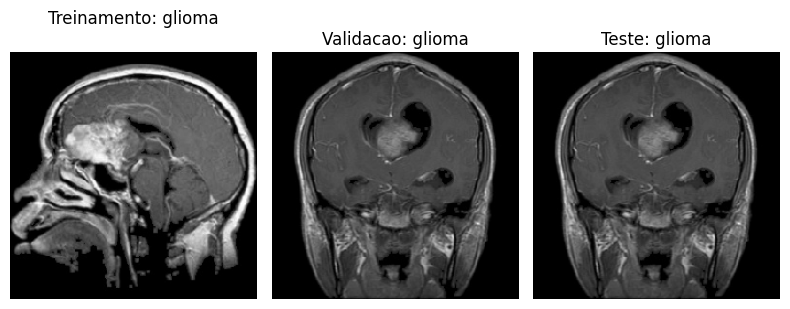

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preparaImagem(generator, index):
  inputImage = generator.filepaths[index]
  label      = generator.classes
  label_name = class_names[label[index]]

  img = image.load_img(inputImage, target_size=(224, 224))
  img = image.img_to_array(img)
  img /= 255.0  # Normaliza a imagem
  return img, label_name

index = 0

imgTrain, labelTrain = preparaImagem(train_generator, index)
imgTest, labelTest   = preparaImagem(test_generator, index)
imgValid, labelValid = preparaImagem(validation_generator, index)

# Exibir as imagens
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title(f'Treinamento: {labelTrain}\n')
plt.imshow(imgTrain)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title(f'Validacao: {labelValid}')
plt.imshow(imgValid)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title(f'Teste: {labelTest}')
plt.imshow(imgTest)
plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf


# Criar o modelo da CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
])
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Substitua o 5 pelo número de classes do seu problema
model.add(Dense(4, activation='softmax'))

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Configuração para permitir o crescimento da memória GPU
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("Using GPU")
else:
    print("Using CPU")

# Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





Using CPU



In [8]:
# Treinar o modelo e armazenar o histórico de treinamento
history = model.fit(train_generator, validation_data=validation_generator, epochs=6)

Epoch 1/6


78/78 [==============================] - 173s 2s/step - loss: 1.1803 - accuracy: 0.4788 - val_loss: 0.8326 - val_accuracy: 0.6425
Epoch 2/6
78/78 [==============================] - 170s 2s/step - loss: 0.6583 - accuracy: 0.7438 - val_loss: 0.5890 - val_accuracy: 0.7697
Epoch 3/6
78/78 [==============================] - 172s 2s/step - loss: 0.3211 - accuracy: 0.8877 - val_loss: 0.5815 - val_accuracy: 0.8052
Epoch 4/6
78/78 [==============================] - 171s 2s/step - loss: 0.1640 - accuracy: 0.9438 - val_loss: 0.6794 - val_accuracy: 0.8003
Epoch 5/6
78/78 [==============================] - 170s 2s/step - loss: 0.0970 - accuracy: 0.9701 - val_loss: 0.7785 - val_accuracy: 0.8357
Epoch 6/6
78/78 [==============================] - 170s 2s/step - loss: 0.0334 - accuracy: 0.9919 - val_loss: 0.8796 - val_accuracy: 0.8374


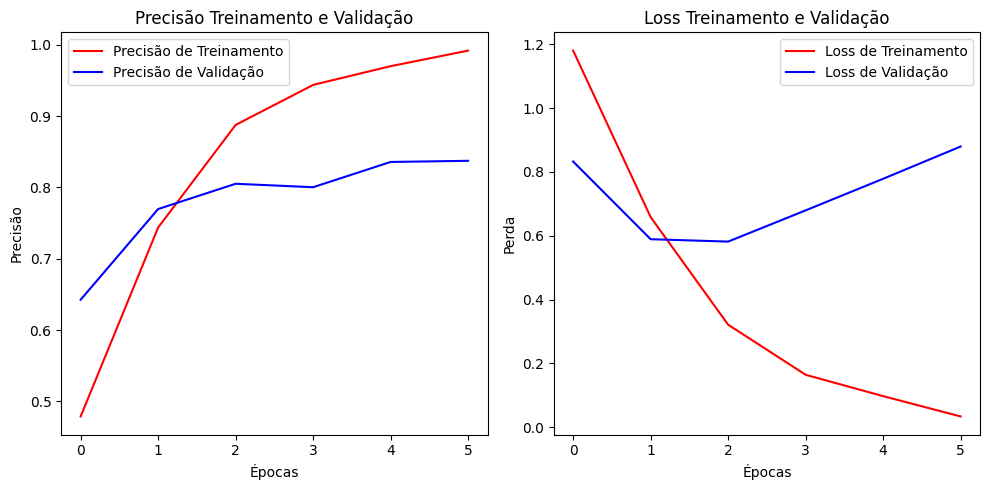

In [9]:
# Obter os valores de precisão e loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Número de épocas
epochs = range(len(acc))

# Plotar precisão de treinamento e validação
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Precisão de Treinamento')
plt.plot(epochs, val_acc, 'b', label='Precisão de Validação')
plt.title('Precisão Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()

#Plotar loss trein. e validacao
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Loss de Treinamento')
plt.plot(epochs, val_loss, 'b', label='Loss de Validação')
plt.title('Loss Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Acurácia no conjunto de teste: {test_acc}')

20/20 [==============================] - 10s 505ms/step - loss: 0.8796 - accuracy: 0.8374
Acurácia no conjunto de teste: 0.8373590707778931


In [11]:
train_loss, train_acc = model.evaluate(train_generator)
print(f'Acurácia no conjunto de treinamento: {train_acc}')

78/78 [==============================] - 45s 575ms/step - loss: 0.0143 - accuracy: 0.9964
Acurácia no conjunto de treinamento: 0.996363639831543


In [12]:
# Carrega e pré-processa as imagens de treinamento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ajuste o tamanho conforme necessário
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 2475 images belonging to 4 classes.


In [13]:
def predicao(generator):
  predictions = model.predict(generator)
  labels      = generator.classes
  return predictions, labels

predictTrain, labelTrain = predicao(train_generator)
predictTest,  labelTest  = predicao(test_generator)
predictValid, labelValid = predicao(validation_generator)

20/20 [==============================] - 10s 501ms/step


In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Calcular a matriz de confusão
print("------ Treinamento -------")
confusion_mtxTrain = confusion_matrix(labelTrain, np.argmax(predictTrain, axis=-1))
print(confusion_mtxTrain)

print("------ Teste -------")
confusion_mtxTest = confusion_matrix(labelTest, np.argmax(predictTest, axis=-1))
print(confusion_mtxTest)

print("------ Validacao -------")
confusion_mtxValid = confusion_matrix(labelValid, np.argmax(predictValid, axis=-1))
print(confusion_mtxValid)

------ Treinamento -------
[[718   2   0   0]
 [  3 727   0   0]
 [  4   0 346   0]
 [  0   0   0 675]]
------ Teste -------
[[143  24   3  11]
 [ 30 141   4   8]
 [  5   7  74   2]
 [  2   5   0 162]]
------ Validacao -------
[[143  24   3  11]
 [ 30 141   4   8]
 [  5   7  74   2]
 [  2   5   0 162]]


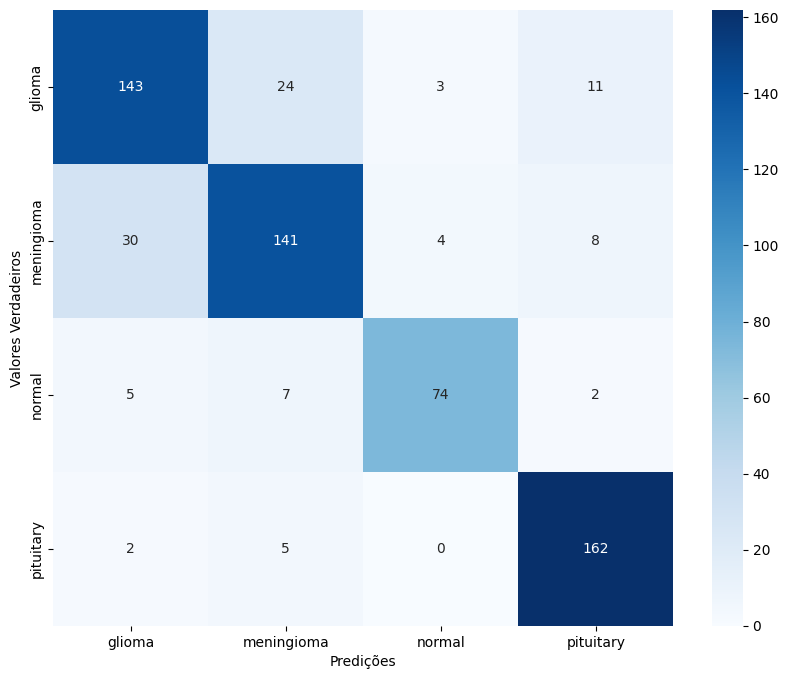

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtxTest, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

In [16]:
import random
# Avaliação do modelo no conjunto de teste
predictions = model.predict(test_generator)
true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

# Identificar índices incorretos
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Selecionar aleatoriamente um índice incorreto
random_index = np.random.choice(incorrect_indices)

20/20 [==============================] - 10s 500ms/step


In [17]:
from tensorflow.keras.preprocessing import image

test_image_path = test_generator.filepaths[random_index]

img = image.load_img(test_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img /= 255.0  # Normaliza a imagem

In [18]:
true_label = class_names[labelTest[random_index]]  # Supondo que class_names contém os nomes das classes
predicted_label = class_names[predicted_labels[random_index]]


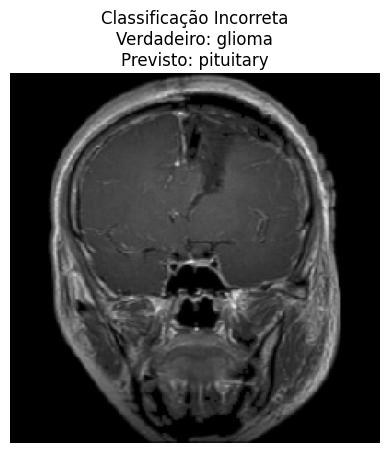

In [19]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f'Classificação Incorreta\nVerdadeiro: {true_label}\nPrevisto: {predicted_label}')
plt.axis('off')
plt.show()


In [20]:
true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

print("Rótulos Verdadeiros:", true_labels[:10])  # Exibe os rótulos verdadeiros das 10 primeiras imagens
print("Rótulos Previstos:", predicted_labels[:10])  # Exibe os rótulos previstos das 10 primeiras imagens


Rótulos Verdadeiros: [0 0 0 0 0 0 0 0 0 0]
Rótulos Previstos: [0 0 0 0 0 0 0 0 0 0]


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0